In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data_to_load)
clinical_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_mouse=clinical_data.merge(mouse_data,how='outer')

# Display the data table for preview
clinical_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
clinical_mouse_mean=clinical_mouse.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
#Convert to DataFrame
#Preview DataFrame
clinical_mouse_reduce=clinical_mouse_mean.reset_index()
clinical_mouse_reduce=clinical_mouse_reduce.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
clinical_mouse_reduce.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_df=clinical_mouse.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
sem_df=sem_df.reset_index()
# Preview DataFrame
sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
clinical_mouse_format=sem_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
clinical_mouse_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [8]:
clinical_mouse_volume=clinical_mouse_reduce
drugs=list(clinical_mouse_reduce.columns)
for i in range(len(drugs)):
    round(clinical_mouse_volume[drugs[i]]*100/clinical_mouse_volume.iloc[0,i],1)

clinical_mouse_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


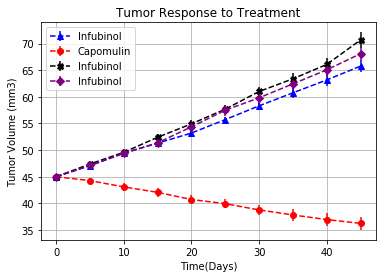

In [9]:
# Generate the Plot (with Error Bars)
x=clinical_mouse_format.index
errorinfubinol=clinical_mouse_format['Infubinol']
volinfubinol=clinical_mouse_volume['Infubinol']
errorcapomulin=clinical_mouse_format['Capomulin']
volincapomulin=clinical_mouse_volume['Capomulin']
errorketapril=clinical_mouse_format['Ketapril']
volinketapril=clinical_mouse_volume['Ketapril']
errorplacebo=clinical_mouse_format['Placebo']
volinplacebo=clinical_mouse_volume['Placebo']

plt.errorbar(x,volinfubinol,errorinfubinol,label='Infubinol',color='Blue',fmt='^',linestyle='--')
plt.errorbar(x,volincapomulin,errorcapomulin,label='Capomulin',color='Red',fmt='o',linestyle='--')
plt.errorbar(x,volinketapril,errorketapril,label='Infubinol',color='Black',fmt='X',linestyle='--')
plt.errorbar(x,volinplacebo,errorplacebo,label='Infubinol',color='Purple',fmt='D',linestyle='--')
plt.grid()
plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time(Days)')
# Save the Figure
plt.savefig('Tumor Response To Treatment.png')

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean=clinical_mouse.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
met_mean=met_mean.reset_index()
# Preview DataFrame
met_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem=clinical_mouse.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
met_sem=met_sem.reset_index()
# Preview DataFrame
met_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
metmean_sites_format=met_mean.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
metmean_sites_format

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [13]:
metsem_sites_format=met_sem.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
metsem_sites_format

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


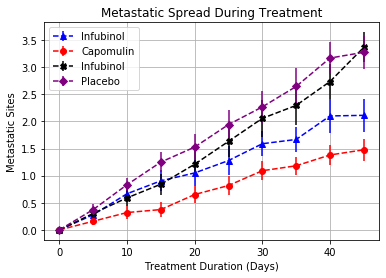

In [14]:
# Generate the Plot (with Error Bars)
xmet=metsem_sites_format.index

met_errorinfubinol=metsem_sites_format['Infubinol']
met_fubinol=metmean_sites_format['Infubinol']
met_errorcapomulin=metsem_sites_format['Capomulin']
met_capomulin=metmean_sites_format['Capomulin']
met_errorketapril=metsem_sites_format['Ketapril']
met_ketapril=metmean_sites_format['Ketapril']
met_errorplacebo=metsem_sites_format['Placebo']
met_placebo=metmean_sites_format['Placebo']

plt.errorbar(xmet,met_fubinol,met_errorinfubinol,label='Infubinol',color='Blue',fmt='^',linestyle='--')
plt.errorbar(xmet,met_capomulin,met_errorcapomulin,label='Capomulin',color='Red',fmt='o',linestyle='--')
plt.errorbar(xmet,met_ketapril,met_errorketapril,label='Infubinol',color='Black',fmt='X',linestyle='--')
plt.errorbar(xmet,met_placebo,met_errorplacebo,label='Placebo',color='Purple',fmt='D',linestyle='--')
plt.grid()
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.ylabel('Metastatic Sites')
plt.xlabel('Treatment Duration (Days)')
# Save the Figure
plt.savefig('Metastatic Spread.png')
# Show the Figure


## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_df=clinical_mouse.groupby(['Drug','Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
mouse_df=mouse_df.reset_index()
# Preview DataFrame
mouse_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
mouse_df_format=mouse_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')
# Preview the Data Frame
mouse_df_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [18]:
mouse_pct=mouse_df_format
drugs=list(mouse_df_format.columns)
for i in range(len(drugs)):
    mouse_pct[drugs[i]]=round(mouse_pct[drugs[i]]*100/mouse_pct.iloc[0,i])

mouse_pct.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.0,92.0,81.0,68.0


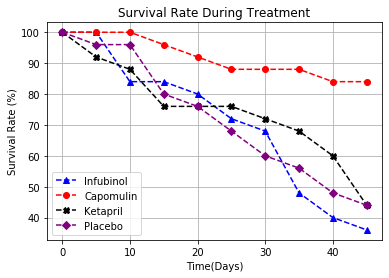

In [19]:
# Generate the Plot (Accounting for percentages)
xmouse=mouse_df_format.index

capomulinpct=mouse_pct['Capomulin']
infubinolpct=mouse_pct['Infubinol']
placebopct=mouse_pct['Placebo']
ketaprilpct=mouse_pct['Ketapril']

plt.plot(xmouse,infubinolpct,label='Infubinol',color='Blue',marker='^',linestyle='--')
plt.plot(xmouse,capomulinpct,label='Capomulin',color='Red',marker='o',linestyle='--')
plt.plot(xmouse,ketaprilpct,label='Ketapril',color='Black',marker='X',linestyle='--')
plt.plot(xmouse,placebopct,label='Placebo',color='Purple',marker='D',linestyle='--')
plt.grid()
plt.legend(loc='best')
plt.title('Survival Rate During Treatment')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Time(Days)')
# Save the Figure
plt.savefig('Survival Rate.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [48]:
# Calculate the percent changes for each drug
tumor_delta_pct = (clinical_mouse_volume.iloc[-1]/clinical_mouse_volume.iloc[0] -1)*100
# Display the data to confirm
tumor_delta_pct

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

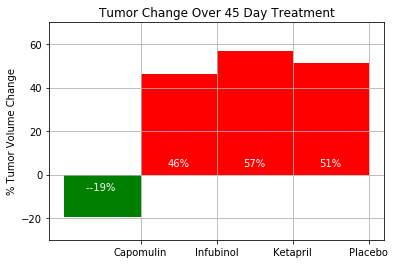

In [57]:
tuple_drug_changes_needed = (tumor_delta_pct["Capomulin"],
               tumor_delta_pct["Infubinol"],
               tumor_delta_pct["Ketapril"],
               tumor_delta_pct["Placebo"])

fig, ax = plt.subplots()
ind = np.arange(len(tuple_drug_changes_needed))
width = 1
Pass = ax.bar(ind[0], pct_changes[0], width, color='green')
Fail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

def labelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def labelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

labelPass(Pass)
labelFail(Fail)

# Save the Figure
fig.savefig('Tumor Change over 45 days.png')
# Show the Figure
fig.show()
# Show the Figure